## Assignment 2


**(i) Perform data pre-processing steps on the dataset. Handle missing values (if any), explore the correlation between variables, and identify any potential outliers.**

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

**Loading data set and checking for missing values**

In [28]:
data = pd.read_csv('ENB2012_data.csv')
df = pd.DataFrame(data)
df.info()
print('\nMissing values in each column:')
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB

Missing values in each column:


X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

**a) Dropping the NaN Values**

In [29]:
df2 = df.dropna()
print(df2)
print('\n\nNumber of Null Values in each column:') 
df2.isna().sum()

       X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
..    ...    ...    ...     ...  ...  ..  ...  ..    ...    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64  16.03

[768 rows x 10 columns]


Number of Null Values in each column:


X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

***Correlation Matrix**ns**

In [30]:
print("The correlation Matrix :")
df2[df2.columns].corr()

The correlation Matrix :


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889431,0.895785
X6,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
X7,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269841,0.207505
X8,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


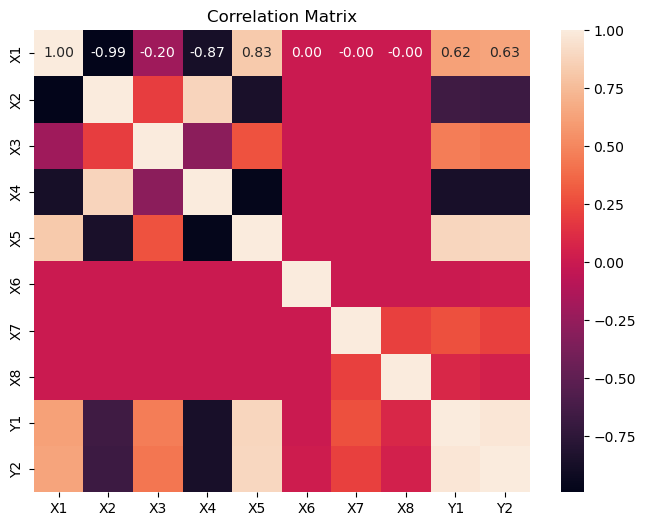

In [31]:
corr_matrix = df.corr() ; 
plt.figure(figsize=(8,6)) ; 
sns.heatmap(corr_matrix, annot=True, fmt=".2f") ; 
plt.title("Correlation Matrix") ; 
plt.show() ;

**c) Outliers**

In [32]:
Q1 = df.quantile(0.25) ; 
Q3 = df.quantile(0.75) ; 
IQR = Q3 - Q1 ; 
outliers = (df<(Q1-1.5*IQR)) | (df>(Q3+ 1.5*IQR)) ; 
df_no_outliers = df[~outliers.any(axis=1)] ; 

print(f"Original dataset size: {df.shape}") ; 
print(f"Dataset size after removing outliers: {df_no_outliers.shape}") ;

Original dataset size: (768, 10)
Dataset size after removing outliers: (768, 10)


This shows that there are no outliners for this dataset.

**(ii) Split the dataset into an 80:20 ratio for training and testing using the sklearn library.**

In [33]:
X = df_no_outliers.drop(columns=['Y1','Y2']).values ; 
y = df_no_outliers[['Y1','Y2']].values ; 

X = np.c_[np.ones((X.shape[0],1)),X] ; 

scaler = StandardScaler() ; 
X[:,1:] = scaler.fit_transform(X[:,1:]) ; 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) ; 

(iii) Train a multivariate linear regression model from scratch using numpy, pandas, and matplotlib. Additionally, train a linear regression model using the sklearn library on the training dataset. Also train ridge and lasso regression model using the sklearn library on the training dataset.

**Multiple Linear Regression from Scratch**

Equation : Y1 = b0 + b1X1 + b2X2 + b4X4 + b5X5 + b7*X7

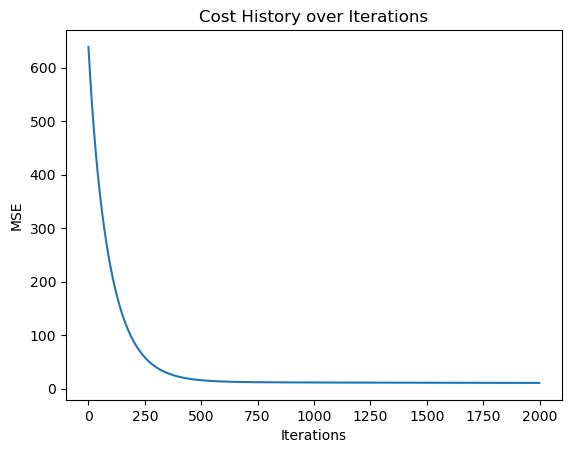

Test MSE: 11.662394373784796
Learned parameters(theta) :
[[22.264316   24.51845093]
 [-0.57374234 -0.687635  ]
 [-1.12326193 -1.14080581]
 [ 2.59523657  2.11104132]
 [-2.34872531 -2.13198723]
 [ 5.29175687  5.24165622]
 [-0.06912983  0.0276526 ]
 [ 2.70745165  1.9975893 ]
 [ 0.3201311   0.04543536]]


In [34]:
# Defining the MSE 
def mse(y_true,y_pred):
    return (np.mean((y_true-y_pred)**2)) ; 

# Defining the gradient descent function
def gradient_descent(X, y, learning_rate=0.001, iterations=1000):
    m,n = X.shape ; 
    theta = np.zeros((n, y.shape[1])) ; 
    cost_history = [] ; 
    
    for i in range(iterations):
        y_pred = np.dot(X,theta) ; 
        gradient = (1/m)*np.dot(X.T,(y_pred-y)) ; 
        theta-= learning_rate*gradient ; 
    
        cost = mse(y, y_pred) ; 
        if np.isnan(cost): 
            print(f"Gradient descent diverged at iteration {i}") 
            break ;
        cost_history.append(cost) ; 
    
    return theta,cost_history ; 

# predict function
def predict(X,theta):
    return np.dot(X, theta) ; 

# Training the model
learning_rate = 0.005 ;
iterations = 2000 ; 
theta, cost_history = gradient_descent(X_train, y_train, learning_rate, iterations) ; 

# Plotting the cost
plt.plot(range(len(cost_history)), cost_history) ; 
plt.title('Cost History over Iterations') ; 
plt.xlabel('Iterations') ;
plt.ylabel('MSE') ; 
plt.show() ; 
# predictions
y_pred = predict(X_test,theta) ; 

# Calculation of MSE 
test_mse = mse(y_test, y_pred) ; 
print(f"Test MSE: {test_mse}") ; 

# Best fit parameters 
print("Learned parameters(theta) :") ;
print(theta) ;

**Linear Regression using sklearn Library**

In [35]:
# Training the model using sklearn library
linear_regressor = LinearRegression() ; 
linear_regressor.fit(X_train,y_train) ; 

# prediction using sklearn model
y_pred_sklearn = linear_regressor.predict(X_test) ; 

# Calculating MSE using sklearn
test_mse_sklearn = mean_squared_error(y_test, y_pred_sklearn) ; 
print(f"Test MSE(sklearn Linear Regression):{test_mse_sklearn}") ; 

print("\nBest fit parameters a/c to sklearn Linear Regression:") ; 
print("Intercept (theta_0):", linear_regressor.intercept_) ; 
print("\nCoefficients (theta_1, theta_2, ...):", linear_regressor.coef_) ; 

Test MSE(sklearn Linear Regression):9.523307751573403

Best fit parameters a/c to sklearn Linear Regression:
Intercept (theta_0): [22.26003576 24.51482281]

Coefficients (theta_1, theta_2, ...): [[ 0.         -6.54054491 -3.61845859  0.80890168 -3.91916361  7.21642111
  -0.03626803  2.68173981  0.32719875]
 [ 0.         -7.51424508 -4.15514954  0.14845992 -4.12354624  7.08078072
   0.06172666  1.96872768  0.05229569]]


**Ridge Regression using sklearn**

In [36]:
# Ridge regression model
ridge_reg = Ridge(alpha=1.0)  ; 
ridge_reg.fit(X_train,y_train) ; 

# predictions for Ridge regression model
y_pred_ridge = ridge_reg.predict(X_test) ;

**Lasso Regression using sklearn**

In [37]:
# Lasso regression model
lasso_reg = Lasso(alpha=0.1) ; 
lasso_reg.fit(X_train ,  y_train) ; 

# predictions for Lasso regression model
y_pred_lasso = lasso_reg.predict(X_test) ; 

(iv) Evaluate the performance for each model on the test dataset using following metrics: R2 score, Mean Squared Error (MSE) and Root Mean Squared Error(RMSE). Compare the performance of the manual model and the sklearn model and plot the predicted vs actual values for both models.

In [38]:
# Linear Regression(manual)
y_pred_normal = predict(X_test, theta) ;

# Sklearn Linear Regression
y_pred_sklearn = linear_regressor.predict(X_test) ; 

# Ridge Regression
y_pred_ridge = ridge_reg.predict(X_test) ; 

# Lasso Regression
y_pred_lasso = lasso_reg.predict(X_test) ;

# function for computation of R2, MSE, and RMSE
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred) ;
    mse = mean_squared_error(y_true, y_pred) ;
    rmse = np.sqrt(mse) ;
    return r2, mse, rmse ;

# Performance Evaluation for Normal Linear Regression
r2_normal, mse_normal, rmse_normal = evaluate_model(y_test,y_pred_normal) ; 

# Performance Evaluation for Sklearn Linear Regression
r2_sklearn, mse_sklearn, rmse_sklearn = evaluate_model(y_test,y_pred_sklearn) ; 

# Performance Evaluation for Ridge Regression
r2_ridge, mse_ridge, rmse_ridge = evaluate_model(y_test , y_pred_ridge) ; 

# Performance Evaluation for Lasso Regression
r2_lasso, mse_lasso, rmse_lasso = evaluate_model(y_test, y_pred_lasso) ; 

# Final results
print("Linear Regression (Manual):") ; 
print(f"R2 Score: {r2_normal}") ; 
print(f"MSE: {mse_normal}") ; 
print(f"RMSE: {rmse_normal}") ; 
print("\nSklearn Linear Regression:") ; 
print(f"R2 Score: {r2_sklearn}") ;
print(f"MSE: {mse_sklearn}") ; 
print(f"RMSE: {rmse_sklearn}") ; 
print("\nRidge Regression:") ;
print(f"R2 Score: {r2_ridge}") ; 
print(f"MSE: {mse_ridge}") ;
print(f"RMSE: {rmse_ridge}") ; 
print("\nLasso Regression:") ;
print(f"R2 Score: {r2_lasso}") ; 
print(f"MSE: {mse_lasso}") ; 
print(f"RMSE: {rmse_lasso}") ; 



Linear Regression (Manual):
R2 Score: 0.8807377693301202
MSE: 11.662394373784798
RMSE: 3.4150247984143247

Sklearn Linear Regression:
R2 Score: 0.90270481100771
MSE: 9.523307751573403
RMSE: 3.085985701777214

Ridge Regression:
R2 Score: 0.9021755236729962
MSE: 9.575735256161664
RMSE: 3.0944684933218602

Lasso Regression:
R2 Score: 0.8942716144732138
MSE: 10.348354098653099
RMSE: 3.216885776438619


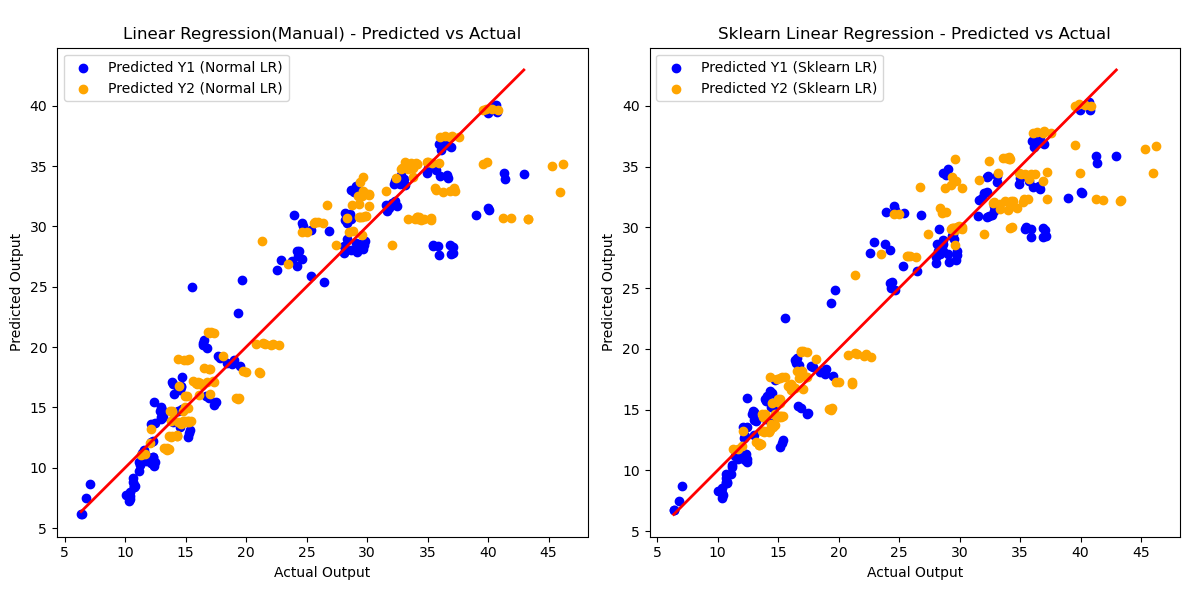

In [39]:
# Plotting Predicted vs Actual Values for Normal and Sklearn Linear Regression
plt.figure(figsize=(12, 6)) ; 
plt.subplot(1,2,1) ; 
plt.scatter(y_test[:,0], y_pred_normal[:, 0], color='blue', label='Predicted Y1 (Normal LR)') ; 
plt.scatter(y_test[:,1], y_pred_normal[:, 1], color='orange', label='Predicted Y2 (Normal LR)') ; 
plt.plot([y_test[:,0].min(), y_test[:, 0].max()], [y_test[:,0].min(), y_test[:, 0].max()], color='red', linewidth=2) ; 
plt.title("\nLinear Regression(Manual) - Predicted vs Actual") ; 
plt.xlabel("Actual Output") ; 
plt.ylabel("Predicted Output") ; 
plt.legend() ; 

# Sklearn Linear Regression
plt.subplot(1,2,2) ; 
plt.scatter(y_test[:,0], y_pred_sklearn[:,0], color='blue', label='Predicted Y1 (Sklearn LR)') ; 
plt.scatter(y_test[:,1], y_pred_sklearn[:,1], color='orange', label='Predicted Y2 (Sklearn LR)') ; 
plt.plot([y_test[:,0].min(), y_test[:,0].max()], [y_test[:,0].min(), y_test[:,0].max()], color='red', linewidth=2) ; 
plt.title("Sklearn Linear Regression - Predicted vs Actual") ; 
plt.xlabel("Actual Output") ; 
plt.ylabel("Predicted Output") ; 
plt.legend() ; 

plt.tight_layout() ; 
plt.show()


(v) Propose energy efficiency improvement suggestions based on the insights from the model results, focusing on building design elements that most significantly impact heating load.

In [40]:
correlation = df2.corrwith(df2['Y1'])
correlation

X1    0.622272
X2   -0.658120
X3    0.455671
X4   -0.861828
X5    0.889431
X6   -0.002587
X7    0.269841
X8    0.087368
Y1    1.000000
Y2    0.975862
dtype: float64

**Suggestions to improve Efficiency**

Features:
          
          X1 -> Relative Compactness
          
          X2 -> Surface Area
          
          X3 -> Wall Area
          
          X4 -> Roof Area 
          
          X5 -> Overall Height
          
          X6 -> Orientation 
          
          X7 -> Glazing Area
          
          X8 -> Glazing Area Distribution

Target
        
         : Y1 -> Heating Lo

         , Y2 -> Cooling Lo

1) Relative Compactness(X1) and Overall Height(X5) of the building has strong correlation with the heating value i.e.Y1 (correlation=0.889 with X5 and correlation =0.62 with X1), so we need to reduce the height of the building and relative compactness if we want to reduce the heating load.
2) Similarly, X2(Surface Area), X4(Roof Area ) has negative strong correlation with Y1. So, By increasing the Surface Area(X2) and Overall Height(X4) of the building results in decrease in the heating load(Y1)ad